# Distributions and Central Limit Theorem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson, expon, lognorm, t

heart=pd.read_csv('datasets/heart.csv')
spotify=pd.read_csv('datasets/spotify.csv')

## 1. Normal Distribution

The normal distribution, also known as the Gaussian distribution, is a bell-shaped curve that is symmetrical about its mean. It is a fundamental concept in statistics, representing a distribution where most observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. This distribution is widely used in various fields to model natural phenomena, errors, and other variables.

Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations, a principle known as the empirical rule or 68-95-99.7 rule.

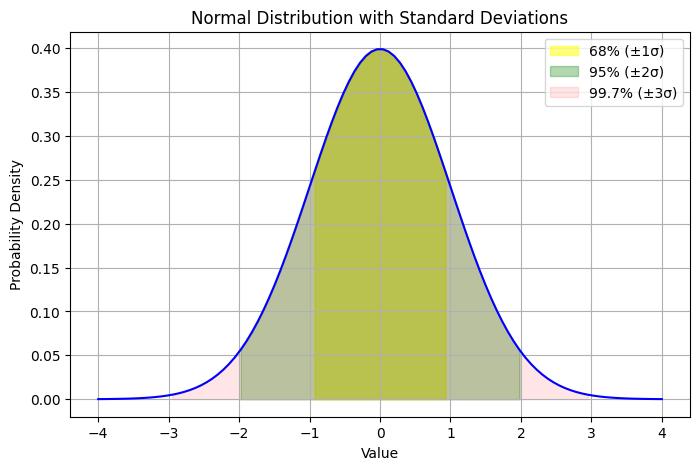

In [2]:
# Define the mean and standard deviation
mean = 0  # Example mean
std_dev = 1  # Example standard deviation

# Creating the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Generate x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

# Generate y values using normal distribution formula
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the normal distribution
ax.plot(x, y, color='blue')

# Fill areas for standard deviations
# 68% range
ax.fill_between(x, y, where=(x > mean - std_dev) & (x < mean + std_dev), color='yellow', alpha=0.5, label='68% (±1σ)')
# 95% range
ax.fill_between(x, y, where=(x > mean - 2*std_dev) & (x < mean + 2*std_dev), color='green', alpha=0.3, label='95% (±2σ)')
# 99.7% range
ax.fill_between(x, y, where=(x > mean - 3*std_dev) & (x < mean + 3*std_dev), color='red', alpha=0.1, label='99.7% (±3σ)')

# Adding title, labels, and legend
ax.set_title('Normal Distribution with Standard Deviations')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

### Cumulative Distribution Function

`norm.cdf`

It's used to calculate the probability that a normally distributed random variable is less than or equal to a given value.

In [3]:
# Calculate the probability
probability = norm.cdf(154, 161, 7) # mean:161, std.dev:7
print(f"The probability of being less than or equal to 154 is {probability:.4f}")

The probability of being less than or equal to 154 is 0.1587


### Percent Point Function

`norm.ppf`

It finds the value below which a given percentage of observations in a normal distribution fall.

In [4]:
# Calculate the value below which 90% of the observations fall
value = norm.ppf(0.9, 161, 7) # mean:161, std.dev:7
print(f"The value below which 90% of the observations fall is {value:.2f}")

The value below which 90% of the observations fall is 169.97


### Random Variates

`norm.rvs`

This method generates random numbers from the specified normal distribution.

In [5]:
# Generate 10 random samples from a normal distribution with mean 161 and std deviation 7
random_samples = norm.rvs(161, 7, size=10) # mean:161, std.dev:7
print(f"Random samples: {random_samples}")

Random samples: [156.23065385 162.28076808 153.7645449  171.75947249 154.67923874
 162.92588586 148.44880742 165.84444653 167.20589733 159.59748518]


## 2. Central Limit Theorem

The sampling distribution of a statistic becomes closer to the normal distribution as number of trials increases. (samples should be random and independent(`replace=True`))

Briefly, the central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

**Example**

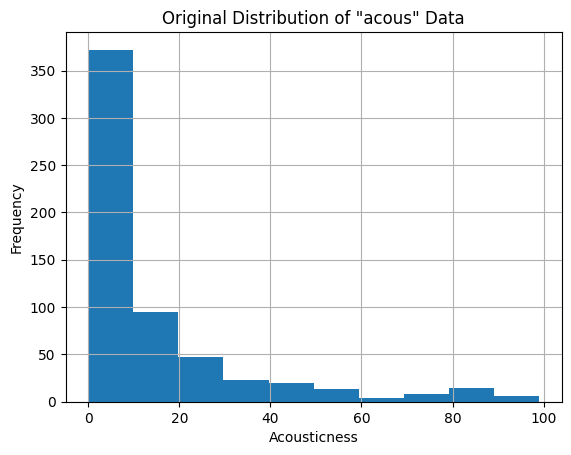

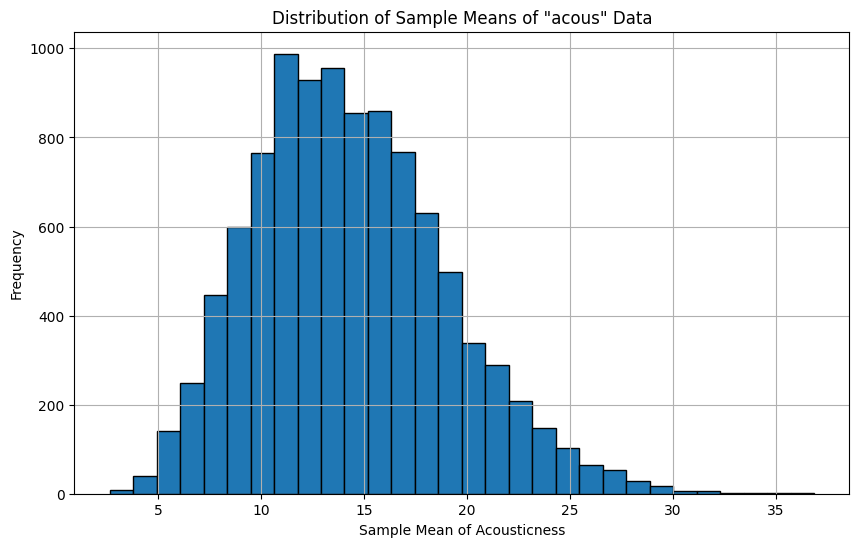

In [6]:
# Plot the histogram of the original 'acous' data
spotify["acous"].hist()
plt.title('Original Distribution of "acous" Data')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

# Set a seed for reproducibility
np.random.seed(42)

# Initialize an empty list to store sample means
sample_means = []

# Sampling 10,000 times, each with a sample size of 20
for _ in range(10000):
    sample = spotify['acous'].sample(20, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Convert to Series and plot histogram of sample means
sample_means_series = pd.Series(sample_means)

# Plot the histogram for sample means
plt.figure(figsize=(10, 6))
sample_means_series.hist(bins=30, edgecolor='black')
plt.title('Distribution of Sample Means of "acous" Data')
plt.xlabel('Sample Mean of Acousticness')
plt.ylabel('Frequency')
plt.show()


The histogram of the sample means, derived from repeatedly sampling the 'acous' column of the Spotify dataset, forms a bell-shaped curve, illustrating the Central Limit Theorem. This demonstrates that even if the original 'acous' data isn't normally distributed, the distribution of the means of these samples becomes increasingly normal as the number of samples grows. This effect highlights the power of the Central Limit Theorem in statistical analysis, showcasing its role in shaping the distribution of sample means towards a normal distribution, regardless of the original data distribution.

## 2. The Poisson Distribution

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. Mathematically, the probability of observing `k` events in an interval is given by the formula:

$$ P(k; \lambda) = \frac{e^{-\lambda} \lambda^k}{k!} $$

where λ is the average number of events per interval, k is the number of occurrences (which must be a non-negative integer, k=0,1,2,…), e is Euler's number, and k! is the factorial of k.


The expected value (or mean) of a Poisson distribution is given by its parameter λ (lambda). The parameter λ represents both the mean and the variance of the distribution.

### Poisson Distributions for Different Lambdas (λ)

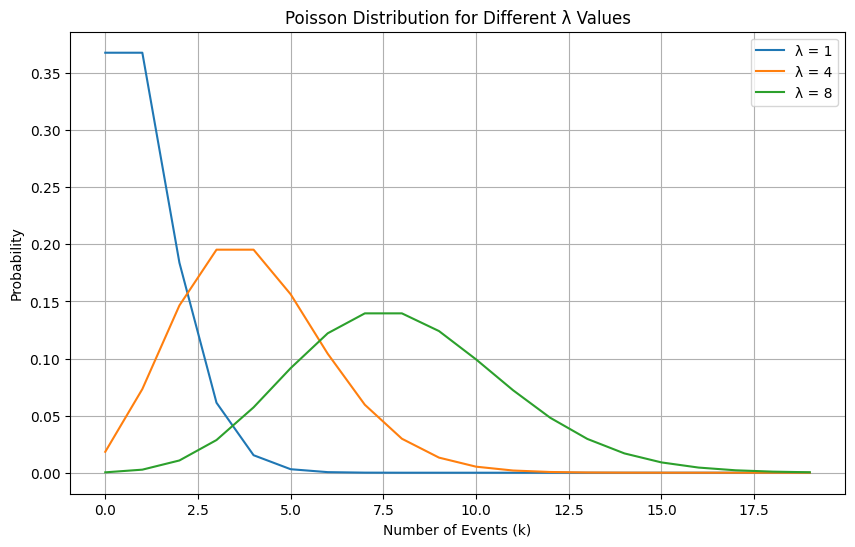

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Define the lambda values
lambdas = [1, 4, 8]

# Generating the range of k values
k = np.arange(0, 20)

# Plotting the Poisson distribution for different lambdas
plt.figure(figsize=(10, 6))

for lam in lambdas:
    plt.plot(k, poisson.pmf(k, lam), label=f'λ = {lam}')

plt.title('Poisson Distribution for Different λ Values')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### Probability Calculations for Poisson Distribution

In [8]:
# Import the Poisson distribution function from scipy.stats
from scipy.stats import poisson

# Define the mean number of responses (lambda)
mean_responses = 4

# Calculate the probability of exactly 5 responses
prob_5 = poisson.pmf(5, mean_responses)
print(f"Probability of exactly 5 responses: {prob_5:.4f}")

# Calculate the probability of 2 or fewer responses
# This is the cumulative probability up to and including 2 responses
prob_2_or_less = poisson.cdf(2, mean_responses)
print(f"Probability of 2 or fewer responses: {prob_2_or_less:.4f}")

# Calculate the probability of more than 10 responses
# This is 1 minus the cumulative probability up to and including 10 responses
prob_over_10 = 1 - poisson.cdf(10, mean_responses)
print(f"Probability of more than 10 responses: {prob_over_10:.4f}")

Probability of exactly 5 responses: 0.1563
Probability of 2 or fewer responses: 0.2381
Probability of more than 10 responses: 0.0028


## 3. Exponential Distribution

The exponential distribution is a continuous probability distribution commonly used to model the time between events in a Poisson process. It is characterized by its parameter λ (lambda), which is the rate parameter, representing the number of events per time unit. The key property of the exponential distribution is its memorylessness, meaning the probability of an event occurring in the next interval is independent of how much time has already elapsed. The distribution is described mathematically by the probability density function $$f(x; \lambda) = \lambda e^{-\lambda x}$$ for $$x \geq 0$$

The expected value (mean) of an exponential distribution: $$\text{Expected Value} = \frac{1}{\lambda}$$

### Exponential Distributions for Different Lambdas (λ)

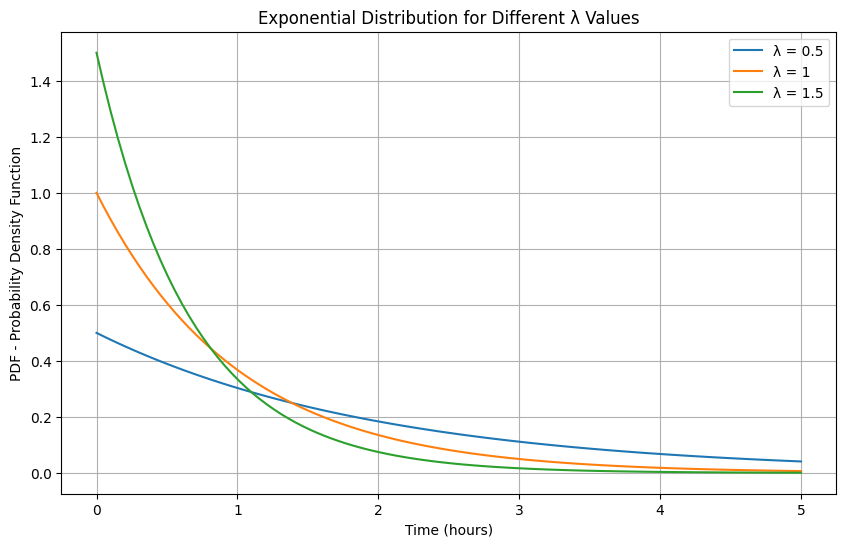

In [9]:
# Define different lambda values
lambdas = [0.5, 1, 1.5]  # Corresponding to mean values of 2, 1, and 2/3 hours
scales = [1/lam for lam in lambdas]  # Scale is the inverse of lambda

# Define a range of x values for the plot
x = np.linspace(0, 5, 100)

# Plotting the Exponential distributions for different lambdas
plt.figure(figsize=(10, 6))

for lam, scale in zip(lambdas, scales):
    plt.plot(x, expon.pdf(x, scale=scale), label=f'λ = {lam}')

plt.title('Exponential Distribution for Different λ Values')
plt.xlabel('Time (hours)')
plt.ylabel('PDF - Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

### Example Case: Response Time Analysis for Customer Support

In this example, we analyze the response times of a customer support team. We model the time until a customer receives a response using an exponential distribution. The rate of responses (λ) is determined to be 1 response per 2.5 hours on average. We will calculate the probabilities for different response time scenarios to better understand the support team's performance.

In [10]:
# Average rate of response: 1 response per 2.5 hours
# Scale parameter (inverse of rate λ) for the distribution
scale = 2.5  

# Probability that a response takes less than 1 hour
prob_less_than_1hr = expon.cdf(1, scale=scale)
print("Probability response takes < 1 hour: {:.4f}".format(prob_less_than_1hr))

# Probability that a response takes more than 4 hours
prob_more_than_4hr = 1 - expon.cdf(4, scale=scale)
print("Probability response takes > 4 hours: {:.4f}".format(prob_more_than_4hr))

# Probability that a response takes between 3 and 4 hours
prob_between_3_and_4hr = expon.cdf(4, scale=scale) - expon.cdf(3, scale=scale)
print("Probability response takes 3-4 hours: {:.4f}".format(prob_between_3_and_4hr))

Probability response takes < 1 hour: 0.3297
Probability response takes > 4 hours: 0.2019
Probability response takes 3-4 hours: 0.0993


## 4. Log-Normal Distribution

The log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. It is often used to model distributions of variables that are positively skewed, such as income, lifespan of machinery, or stock prices. The log-normal distribution is parameterized by the mean (μ) and standard deviation (σ) of the variable's natural logarithm. Unlike the normal distribution, the log-normal distribution is bounded at zero and skewed to the right, making it suitable for modeling quantities that cannot assume negative values.

### Log-Normal Distributions with Different Parameters

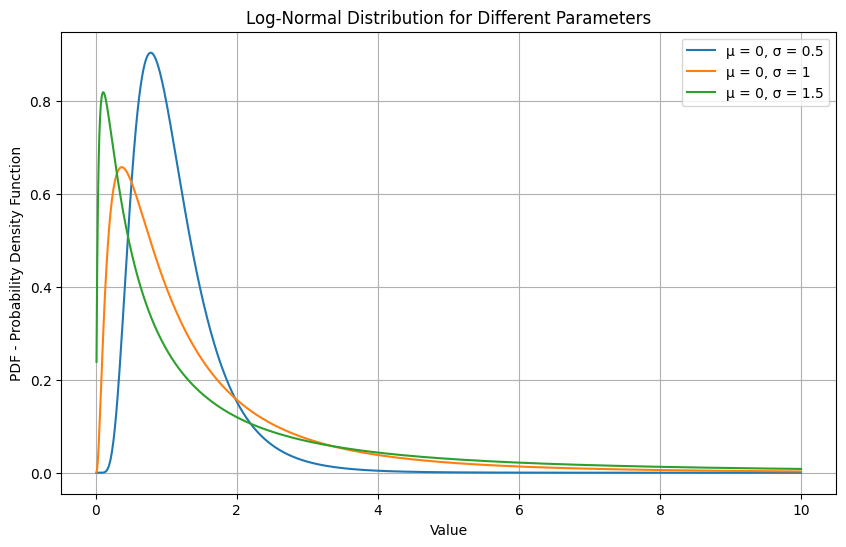

In [11]:
# Define different sets of mean (mu) and standard deviation (sigma) for the log-normal distribution
params = [(0, 0.5), (0, 1), (0, 1.5)]  # (mu, sigma)

# Define a range of x values for the plot
x = np.linspace(0.01, 10, 1000)

# Plotting the log-normal distributions for different sets of parameters
plt.figure(figsize=(10, 6))

for mu, sigma in params:
    distribution = lognorm(s=sigma, scale=np.exp(mu))
    plt.plot(x, distribution.pdf(x), label=f'μ = {mu}, σ = {sigma}')

plt.title('Log-Normal Distribution for Different Parameters')
plt.xlabel('Value')
plt.ylabel('PDF - Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

### Example Case: Analysis of Electronic Device Prices

Let's consider a different scenario where we analyze the prices of a high-end electronic device, like a smartphone or laptop. These prices usually exhibit some degree of positive skewness but within a narrower range than housing prices. We'll assume the natural logarithm of the device prices is normally distributed with a mean (μ) of 7 and a standard deviation (σ) of 0.25, representing a typical range of prices in hundreds of dollars.

In [12]:
# Parameters for the log-normal distribution: mean (mu) and standard deviation (sigma) of the logarithm of the variable
mu = 7
sigma = 0.25

# Creating a log-normal distribution instance
distribution = lognorm(s=sigma, scale=np.exp(mu))

# Probability that the device price is less than $1,500
prob_less_than_1500 = distribution.cdf(1500)
print("Probability device price is < $1,500: {:.2f}".format(prob_less_than_1500))

# Probability that the device price is more than $2,000
prob_more_than_2000 = 1 - distribution.cdf(2000)
print("Probability device price is > $2,000: {:.2f}".format(prob_more_than_2000))

# Probability that the device price is between $1,800 and $2,000
prob_between_1800_and_2000 = distribution.cdf(2000) - distribution.cdf(1800)
print("Probability device price is between $1,800 and $2,000: {:.2f}".format(prob_between_1800_and_2000))

Probability device price is < $1,500: 0.89
Probability device price is > $2,000: 0.01
Probability device price is between $1,800 and $2,000: 0.02


## 5. The Student's t-distribution 

The Student's t-distribution is a probability distribution that arises in the problem of estimating the mean of a normally distributed population when the sample size is small and the population standard deviation is unknown. It was first identified by William Sealy Gosset under the pseudonym "Student."

Key differences between the Student's t-distribution and the normal distribution include:

**1. Shape**: While both distributions are symmetric and bell-shaped, the t-distribution has heavier tails than the normal distribution. This means that it is more prone to producing values that fall far from its mean.

**2. Degrees of Freedom**: The shape of the t-distribution depends on the degrees of freedom (df), which are related to the sample size. As the degrees of freedom increase, the t-distribution approaches the normal distribution. In practical terms, when the sample size is above 30 (thus, degrees of freedom above 30), the t-distribution is very similar to the normal distribution.

**3. Standard Deviation**: Unlike the normal distribution, which has a constant standard deviation, the standard deviation of the t-distribution varies with the degrees of freedom and is always greater than 1 (though it approaches 1 as the degrees of freedom increase).

_The t-distribution is particularly useful in scenarios where:_

**_Small Sample Sizes:_** When sample sizes are small (typically less than 30), the t-distribution provides a better estimate for the spread and tails of the data than the normal distribution.

_**Unknown Population Variance:**_ When the population variance (or standard deviation) is unknown, which is common in real-world scenarios, the t-distribution is used for constructing confidence intervals and for hypothesis testing concerning the mean of a normally distributed population.

**_Robustness to Sample Size:_** It is more robust to variations in sample size compared to the normal distribution, which assumes a known population variance.

Overall, the Student's t-distribution is vital in statistics, especially for small sample sizes or when the population variance is unknown. It is a cornerstone of inferential statistics and is widely used in t-tests, confidence intervals, and in Bayesian analysis.

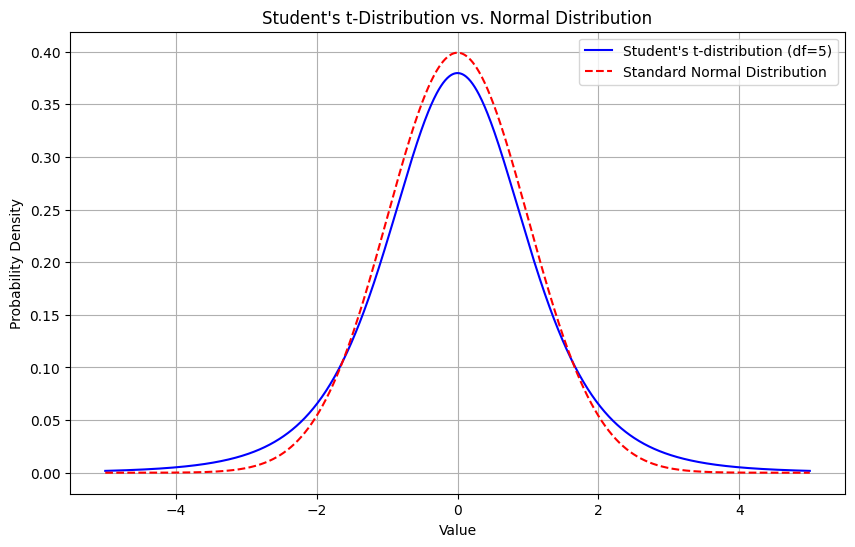

In [13]:
# Define a range of x values
x = np.linspace(-5, 5, 1000)

# Student's t-distribution with 5 degrees of freedom
t_distribution = t.pdf(x, df=5)

# Standard normal distribution
normal_distribution = norm.pdf(x)

# Plotting both distributions
plt.figure(figsize=(10, 6))
plt.plot(x, t_distribution, label="Student's t-distribution (df=5)", color='blue')
plt.plot(x, normal_distribution, label="Standard Normal Distribution", color='red', linestyle='dashed')
plt.title("Student's t-Distribution vs. Normal Distribution")
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()